In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit import Chem
from tqdm import tqdm
import pandas as pd
import numpy as np

In [2]:
data = pd.read_json('../datasets/qm9.json.gz', lines=True)

In [3]:
def compute_morgan_fingerprints(smiles: str, fingerprint_length: int, fingerprint_radius: int):
    """Get Morgan Fingerprint of a specific SMILES string.
    Adapted from: <https://github.com/google-research/google-research/blob/
    dfac4178ccf521e8d6eae45f7b0a33a6a5b691ee/mol_dqn/chemgraph/dqn/deep_q_networks.py#L750>
    Args:
      graph (str): The molecule as a SMILES string
      fingerprint_length (int): Bit-length of fingerprint
      fingerprint_radius (int): Radius used to compute fingerprint
    Returns:
      np.array. shape = [hparams, fingerprint_length]. The Morgan fingerprint.
    """
    # Parse the molecule
    molecule = Chem.MolFromSmiles(smiles)

    # Compute the fingerprint
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(
        molecule, fingerprint_radius, fingerprint_length)
    arr = np.zeros((1,), dtype=np.bool)

    # ConvertToNumpyArray takes ~ 0.19 ms, while
    # np.asarray takes ~ 4.69 ms
    DataStructs.ConvertToNumpyArray(fingerprint, arr)
    return arr

In [4]:
class MorganFingerprintTransformer(BaseEstimator, TransformerMixin):
    """Class that converts SMILES strings to fingerprint vectors"""
    
    def __init__(self, length: int = 128, radius: int = 3):
        self.length = length
        self.radius = radius
    
    def fit(self, X, y=None):
        return self  # Do need to do anything
    
    def transform(self, X, y=None):
        """Compute the fingerprints
        
        Args:
            X: List of SMILES strings
        Returns:
            Array of fingerprints
        """
        
        fing = [compute_morgan_fingerprints(m, self.length, self.radius) for m in X]
        return np.vstack(fing)

In [5]:
model = Pipeline([
    ('fingerprint', MorganFingerprintTransformer()),
    ('knn', KNeighborsRegressor(n_neighbors=1, metric='jaccard', n_jobs=-1))  # n_jobs = -1 lets the model run all available processors
])

In [6]:
train_data, test_data = train_test_split(data, train_size=1000, test_size=2000)

In [7]:
kNN_neighbor_1 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [8]:
model.set_params(knn__n_neighbors=2)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=2))])

In [9]:
kNN_neighbor_2 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [10]:
model.set_params(knn__n_neighbors=4)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=4))])

In [11]:
kNN_neighbor_4 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [12]:
model.set_params(knn__n_neighbors=8)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=8))])

In [13]:
kNN_neighbor_8 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [14]:
model.set_params(knn__n_neighbors=16)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=16))])

In [15]:
kNN_neighbor_16 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [16]:
model.set_params(knn__n_neighbors=32)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=32))])

In [17]:
kNN_neighbor_32 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [18]:
model.set_params(knn__n_neighbors=64)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=64))])

In [19]:
kNN_neighbor_64 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [20]:
model.set_params(knn__n_neighbors=128)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=128))])

In [21]:
kNN_neighbor_128 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

Text(0, 0.5, 'MSE')

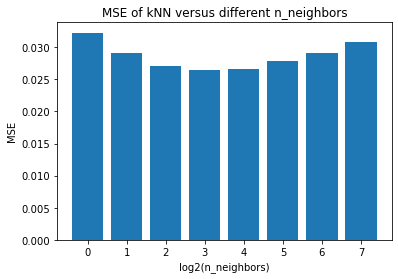

In [22]:
fig1 = plt.bar([0, 1, 2, 3, 4, 5, 6, 7],[mean_absolute_error(kNN_neighbor_1,test_data['bandgap']),mean_absolute_error(kNN_neighbor_2,test_data['bandgap']),mean_absolute_error(kNN_neighbor_4,test_data['bandgap']),mean_absolute_error(kNN_neighbor_8,test_data['bandgap']),mean_absolute_error(kNN_neighbor_16,test_data['bandgap']),mean_absolute_error(kNN_neighbor_32,test_data['bandgap']),mean_absolute_error(kNN_neighbor_64,test_data['bandgap']),mean_absolute_error(kNN_neighbor_128,test_data['bandgap'])])
plt.title('MSE of kNN versus different n_neighbors')
plt.xlabel('log2(n_neighbors)')
plt.ylabel('MSE')

In [23]:
model = Pipeline([
    ('fingerprint', MorganFingerprintTransformer()),
    ('RFE', RFE(RandomForestRegressor(), n_features_to_select=32, step=4)),
    ('knn', KNeighborsRegressor(n_neighbors=1, metric='jaccard', n_jobs=-1))  # n_jobs = -1 lets the model run all available processors
])

In [24]:
kNN_neighbor_RFE_1 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [25]:
model.set_params(knn__n_neighbors=2)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('RFE',
                 RFE(estimator=RandomForestRegressor(), n_features_to_select=32,
                     step=4)),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=2))])

In [26]:
kNN_neighbor_RFE_2 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [27]:
model.set_params(knn__n_neighbors=4)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('RFE',
                 RFE(estimator=RandomForestRegressor(), n_features_to_select=32,
                     step=4)),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=4))])

In [28]:
kNN_neighbor_RFE_4 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [29]:
model.set_params(knn__n_neighbors=8)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('RFE',
                 RFE(estimator=RandomForestRegressor(), n_features_to_select=32,
                     step=4)),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=8))])

In [30]:
kNN_neighbor_RFE_8 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [31]:
model.set_params(knn__n_neighbors=16)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('RFE',
                 RFE(estimator=RandomForestRegressor(), n_features_to_select=32,
                     step=4)),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=16))])

In [32]:
kNN_neighbor_RFE_16 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [33]:
model.set_params(knn__n_neighbors=32)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('RFE',
                 RFE(estimator=RandomForestRegressor(), n_features_to_select=32,
                     step=4)),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=32))])

In [34]:
kNN_neighbor_RFE_32 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [35]:
model.set_params(knn__n_neighbors=64)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('RFE',
                 RFE(estimator=RandomForestRegressor(), n_features_to_select=32,
                     step=4)),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=64))])

In [36]:
kNN_neighbor_RFE_64 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

In [37]:
model.set_params(knn__n_neighbors=128)

Pipeline(steps=[('fingerprint', MorganFingerprintTransformer()),
                ('RFE',
                 RFE(estimator=RandomForestRegressor(), n_features_to_select=32,
                     step=4)),
                ('knn',
                 KNeighborsRegressor(metric='jaccard', n_jobs=-1,
                                     n_neighbors=128))])

In [38]:
kNN_neighbor_RFE_128 = model.fit(train_data['smiles_0'],train_data['bandgap']).predict(test_data['smiles_0'])

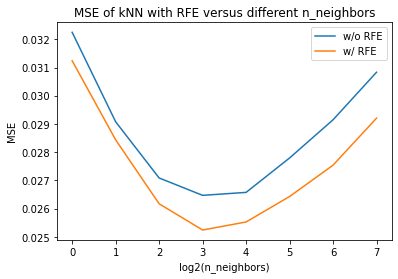

In [48]:
plt.plot([0, 1, 2, 3, 4, 5, 6, 7],[mean_absolute_error(kNN_neighbor_1,test_data['bandgap']),mean_absolute_error(kNN_neighbor_2,test_data['bandgap']),mean_absolute_error(kNN_neighbor_4,test_data['bandgap']),mean_absolute_error(kNN_neighbor_8,test_data['bandgap']),mean_absolute_error(kNN_neighbor_16,test_data['bandgap']),mean_absolute_error(kNN_neighbor_32,test_data['bandgap']),mean_absolute_error(kNN_neighbor_64,test_data['bandgap']),mean_absolute_error(kNN_neighbor_128,test_data['bandgap'])],
    [0, 1, 2, 3, 4, 5, 6, 7],[mean_absolute_error(kNN_neighbor_RFE_1,test_data['bandgap']),mean_absolute_error(kNN_neighbor_RFE_2,test_data['bandgap']),mean_absolute_error(kNN_neighbor_RFE_4,test_data['bandgap']),mean_absolute_error(kNN_neighbor_RFE_8,test_data['bandgap']),mean_absolute_error(kNN_neighbor_RFE_16,test_data['bandgap']),mean_absolute_error(kNN_neighbor_RFE_32,test_data['bandgap']),mean_absolute_error(kNN_neighbor_RFE_64,test_data['bandgap']),mean_absolute_error(kNN_neighbor_RFE_128,test_data['bandgap'])])
plt.title('MSE of kNN with RFE versus different n_neighbors')
plt.xlabel('log2(n_neighbors)')
plt.ylabel('MSE')
plt.legend(['w/o RFE','w/ RFE'])